Total number of classes: 17
Class "Robert Downey Jr": 100 images
Class "Hugh Jackman": 100 images
Class "Will Smith": 100 images
Class "Brad Pitt": 100 images
Class "Jennifer Lawrence": 100 images
Class "Sandra Bullock": 100 images
Class "Tom Cruise": 100 images
Class "Leonardo DiCaprio": 100 images
Class "Angelina Jolie": 100 images
Class "Johnny Depp": 100 images
Class "Nicole Kidman": 100 images
Class "Scarlett Johansson": 200 images
Class "Denzel Washington": 100 images
Class "Megan Fox": 100 images
Class "Kate Winslet": 100 images
Class "Tom Hanks": 100 images
Class "Natalie Portman": 100 images


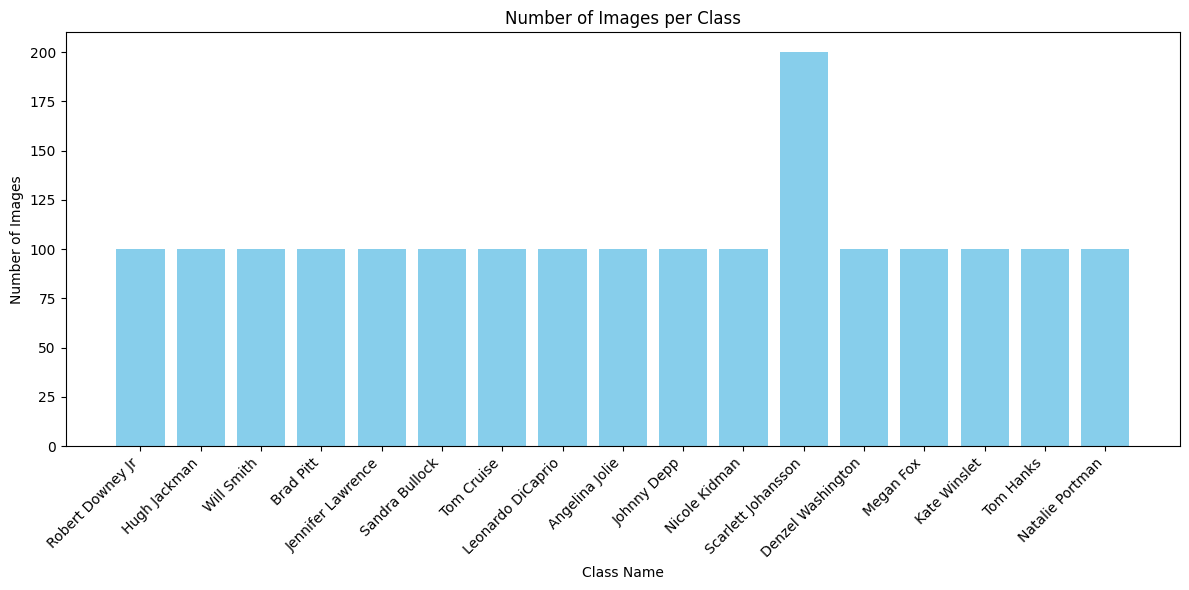

In [7]:
import os
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")
dataset_path=path+'/Celebrity Faces Dataset'
class_image_count = {}

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        num_images = len([img for img in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, img))])
        class_image_count[class_name] = num_images

num_classes = len(class_image_count)
print(f'Total number of classes: {num_classes}')

for class_name, num_images in class_image_count.items():
    print(f'Class "{class_name}": {num_images} images')

plt.figure(figsize=(12, 6))
plt.bar(class_image_count.keys(), class_image_count.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.tight_layout()
plt.show()


In [31]:
# import cv2
# from tqdm import tqdm

# # Initialize face detector and create output folder for extracted faces if it doesn't exist
# cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
# face_cascade = cv2.CascadeClassifier(cascade_path)
# output_path = './extracted_faces'

# if not os.path.exists(output_path):
#     os.makedirs(output_path)

# def extract_and_save_faces(image_path, class_name, output_folder):
#     img = cv2.imread(image_path)
#     if img is None:
#         print(f"Error reading image: {image_path}")
#         return

#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

#     if len(faces) == 0:
#         print(f"No face detected in image: {image_path}")
#         return

#     class_folder = os.path.join(output_folder, class_name)
#     if not os.path.exists(class_folder):
#         os.makedirs(class_folder)

#     for i, (x, y, w, h) in enumerate(faces):
#         x, y = max(0, x), max(0, y)
#         w, h = min(w, img.shape[1] - x), min(h, img.shape[0] - y)

#         face_img = img[y:y+h, x:x+w]

#         if face_img.size == 0:
#             print(f"Error: Empty face region in image {image_path}")
#             continue

#         face_filename = f"{os.path.splitext(os.path.basename(image_path))[0]}_face_{i}.jpg"
#         cv2.imwrite(os.path.join(class_folder, face_filename), face_img)

# # Iterate through the dataset and extract faces from each image
# for root, dirs, files in os.walk(dataset_path):
#     for file in tqdm(files):
#         if file.endswith(('.jpg', '.jpeg', '.png')):
#             image_path = os.path.join(root, file)
#             class_name = os.path.basename(root)
#             extract_and_save_faces(image_path, class_name, output_path)

# print("Face extraction complete!")


In [32]:
from mtcnn import MTCNN
import cv2
import os
from tqdm import tqdm

# Initialize MTCNN detector
detector = MTCNN()
output_path = './extracted_faces'

if not os.path.exists(output_path):
    os.makedirs(output_path)

def extract_and_save_faces_mtcnn(image_path, class_name, output_folder):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return

    # Convert image to RGB (MTCNN expects RGB format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img_rgb)

    if len(faces) == 0:
        print(f"No face detected in image: {image_path}")
        return

    class_folder = os.path.join(output_folder, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    for i, face in enumerate(faces):
        x, y, w, h = face['box']
        x, y = max(0, x), max(0, y)
        w, h = min(w, img.shape[1] - x), min(h, img.shape[0] - y)

        face_img = img[y:y+h, x:x+w]

        if face_img.size == 0:
            print(f"Error: Empty face region in image {image_path}")
            continue

        # Save face with a unique filename
        face_filename = f"{os.path.splitext(os.path.basename(image_path))[0]}_face_{i}.jpg"
        cv2.imwrite(os.path.join(class_folder, face_filename), face_img)

# Iterate through the dataset and extract faces using MTCNN
for root, dirs, files in os.walk(dataset_path):
    for file in tqdm(files):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            class_name = os.path.basename(root)
            extract_and_save_faces_mtcnn(image_path, class_name, output_path)

print("Face extraction complete!")


0it [00:00, ?it/s]
 15% 15/100 [00:02<00:14,  5.68it/s]

No face detected in image: /home/jupyter/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Robert Downey Jr/076_318ed434.jpg


100% 100/100 [00:18<00:00,  5.55it/s]
100% 100/100 [00:17<00:00,  5.65it/s]
100% 100/100 [00:17<00:00,  5.82it/s]
100% 100/100 [00:16<00:00,  6.15it/s]
100% 100/100 [00:17<00:00,  5.69it/s]
100% 100/100 [00:17<00:00,  5.72it/s]
100% 100/100 [00:16<00:00,  5.91it/s]
100% 100/100 [00:17<00:00,  5.79it/s]
100% 100/100 [00:17<00:00,  5.83it/s]
100% 100/100 [00:17<00:00,  5.72it/s]
100% 100/100 [00:17<00:00,  5.76it/s]
  8% 16/200 [00:02<00:33,  5.57it/s]

No face detected in image: /home/jupyter/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/080_d7addbd8.jpg


 44% 87/200 [00:14<00:18,  6.03it/s]

No face detected in image: /home/jupyter/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/187_b430a570.jpg


100% 200/200 [00:34<00:00,  5.83it/s]
100% 100/100 [00:17<00:00,  5.72it/s]
100% 100/100 [00:17<00:00,  5.71it/s]
 47% 47/100 [00:08<00:09,  5.60it/s]

No face detected in image: /home/jupyter/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Kate Winslet/058_7f95baf4.jpg


100% 100/100 [00:17<00:00,  5.78it/s]
 39% 39/100 [00:06<00:09,  6.29it/s]

No face detected in image: /home/jupyter/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Hanks/042_1276f85d.jpg


 75% 75/100 [00:12<00:04,  6.11it/s]

No face detected in image: /home/jupyter/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Hanks/100_b712e7ca.jpg


100% 100/100 [00:16<00:00,  6.08it/s]
100% 100/100 [00:17<00:00,  5.74it/s]

Face extraction complete!


Total number of classes: 17
Class "Robert Downey Jr": 100 images
Class "Hugh Jackman": 100 images
Class "Will Smith": 100 images
Class "Brad Pitt": 100 images
Class "Jennifer Lawrence": 100 images
Class "Sandra Bullock": 100 images
Class "Tom Cruise": 100 images
Class "Leonardo DiCaprio": 100 images
Class "Angelina Jolie": 100 images
Class "Johnny Depp": 100 images
Class "Nicole Kidman": 100 images
Class "Scarlett Johansson": 200 images
Class "Denzel Washington": 100 images
Class "Megan Fox": 100 images
Class "Kate Winslet": 100 images
Class "Tom Hanks": 100 images
Class "Natalie Portman": 100 images


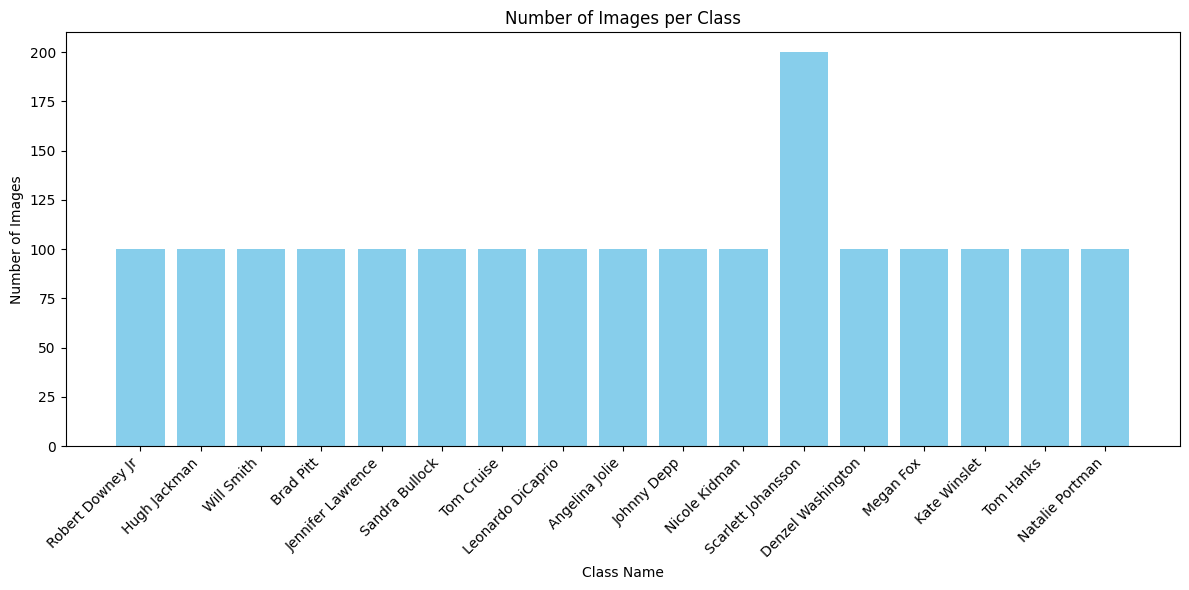

In [33]:
import os
import matplotlib.pyplot as plt

# Path to the extracted faces dataset
class_image_count = {}

# Count the number of images in each class directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        num_images = len([img for img in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, img))])
        class_image_count[class_name] = num_images

num_classes = len(class_image_count)
print(f'Total number of classes: {num_classes}')

for class_name, num_images in class_image_count.items():
    print(f'Class "{class_name}": {num_images} images')

# Plot a bar chart showing the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(class_image_count.keys(), class_image_count.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.tight_layout()
plt.show()


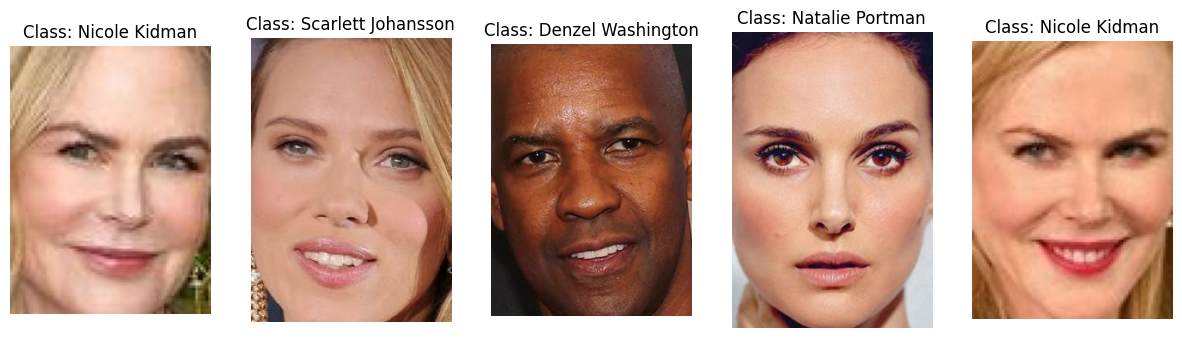

In [36]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Path to the extracted faces dataset
dataset_path = './extracted_faces'

def get_random_images_from_classes(dataset_path, num_images=5):
    """Select random images from the classes."""
    all_images = []

    # Traverse through class directories and collect image paths
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):
            for file in os.listdir(class_folder):
                if file.endswith(('.jpg', '.jpeg', '.png')):
                    all_images.append(os.path.join(class_folder, file))
    
    # Select random images from the list
    random_images = random.sample(all_images, min(num_images, len(all_images)))
    return random_images

def display_images(image_paths):
    """Display the selected images."""
    plt.figure(figsize=(15, 10))

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Class: {os.path.basename(os.path.dirname(image_path))}")

    plt.show()

# Select and display 5 random images from the classes
random_images = get_random_images_from_classes(dataset_path, num_images=5)
display_images(random_images)


# Train_valid and Test

In [37]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [38]:
import os
import shutil
from sklearn.model_selection import train_test_split
from multiprocessing import Pool

base_dir = './working/split_dataset'
train_valid_dir = os.path.join(base_dir, 'virtual_document')
test_dir = os.path.join(base_dir, 'test')

# Create directories for train_valid and test
for folder in [train_valid_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

# Function to copy images from src to dest
def copy_images(image_paths, dest_folder):
    for img_path in image_paths:
        class_name = os.path.basename(os.path.dirname(img_path))
        class_folder = os.path.join(dest_folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        shutil.copy(img_path, class_folder)

# Function to get images from a class
def get_images_from_class(class_name):
    class_dir = os.path.join(dataset_path, class_name)
    images = []
    if os.path.isdir(class_dir):
        with os.scandir(class_dir) as entries:
            for entry in entries:
                if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    images.append((entry.path, class_name))
    return images

# Collect all images and labels
all_images = []
all_labels = []

# Use Pool to speed up the process of gathering images from each class
with Pool() as pool:
    results = pool.map(get_images_from_class, os.listdir(dataset_path))
    for result in results:
        for img_path, label in result:
            all_images.append(img_path)
            all_labels.append(label)

# Split data into 80% train_valid and 20% test
train_valid_images, test_images, train_valid_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Copy images into corresponding directories
copy_images(train_valid_images, train_valid_dir)
copy_images(test_images, test_dir)

print(f'Number of images in virtual_documents: {len(train_valid_images)}')
print(f'Number of images in test: {len(test_images)}')

Number of images in virtual_documents: 1587
Number of images in test: 397


In [39]:
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


dataset_path = './working/split_dataset/virtual_document'
output_path = './working/virtual_documents'

# Desired number of images for each class
desired_count = 400

# Create an ImageDataGenerator for image augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each class (subdirectory)
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    output_class_dir = os.path.join(output_path, class_name)

    # Create output directory if it doesn't exist
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    # Get the list of image files in the class directory
    image_files = os.listdir(class_dir)
    image_count = len(image_files)
    
    # Copy the original images first
    for img_file in image_files:
        src_path = os.path.join(class_dir, img_file)
        dst_path = os.path.join(output_class_dir, img_file)
        if not os.path.exists(dst_path):
            shutil.copy(src_path, dst_path)
    
    # Generate additional images if the class does not meet the desired count
    i = 0
    while image_count + i < desired_count:
        img_file = image_files[i % len(image_files)]
        img_path = os.path.join(class_dir, img_file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Generate new images from the original with batch_size=10
        for batch in datagen.flow(x, batch_size=10, save_to_dir=output_class_dir, save_prefix=class_name, save_format='jpg'):
            i += batch.shape[0]  # Increment by batch size
            if image_count + i >= desired_count:
                break

    print(f"Class {class_name} has reached {desired_count} images.")

# Ensure that all classes have the same number of images
max_count = max(len(os.listdir(os.path.join(output_path, class_name))) for class_name in os.listdir(output_path))
for class_name in os.listdir(output_path):
    class_dir = os.path.join(output_path, class_name)
    current_count = len(os.listdir(class_dir))
    if current_count < desired_count:
        print(f"Class {class_name} has {current_count} images, needs {desired_count - current_count} more.")
        # Generate additional images if needed
        i = 0
        while current_count + i < desired_count:
            img_file = os.listdir(class_dir)[i % len(os.listdir(class_dir))]
            img_path = os.path.join(class_dir, img_file)
            img = load_img(img_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            for batch in datagen.flow(x, batch_size=10, save_to_dir=class_dir, save_prefix=class_name, save_format='jpg'):
                i += batch.shape[0]
                if current_count + i >= desired_count:
                    break

        print(f"Class {class_name} has reached {desired_count} images.")
image_dir = output_path

Class Robert Downey Jr has reached 400 images.
Class Hugh Jackman has reached 400 images.
Class Will Smith has reached 400 images.
Class Brad Pitt has reached 400 images.
Class Jennifer Lawrence has reached 400 images.
Class Sandra Bullock has reached 400 images.
Class Tom Cruise has reached 400 images.
Class Leonardo DiCaprio has reached 400 images.
Class Angelina Jolie has reached 400 images.
Class Johnny Depp has reached 400 images.
Class Nicole Kidman has reached 400 images.
Class Scarlett Johansson has reached 400 images.
Class Denzel Washington has reached 400 images.
Class Megan Fox has reached 400 images.
Class Kate Winslet has reached 400 images.
Class Tom Hanks has reached 400 images.
Class Natalie Portman has reached 400 images.
Class Robert Downey Jr has 395 images, needs 5 more.
Class Robert Downey Jr has reached 400 images.
Class Hugh Jackman has 394 images, needs 6 more.
Class Hugh Jackman has reached 400 images.
Class Will Smith has 397 images, needs 3 more.
Class Will 

# Train and Valid

In [40]:
import os
import shutil
from sklearn.model_selection import train_test_split
from multiprocessing import Pool


dataset_path = './working/virtual_documents'
base_dir = './working/split_dataset'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

# Create directories for train and valid datasets
for folder in [train_dir, valid_dir]:
    os.makedirs(folder, exist_ok=True)

# Function to copy images from source to destination
def copy_images(image_paths, dest_folder):
    for img_path in image_paths:
        class_name = os.path.basename(os.path.dirname(img_path))
        class_folder = os.path.join(dest_folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        shutil.copy(img_path, class_folder)

# Function to get images from a class folder
def get_images_from_class(class_name):
    class_dir = os.path.join(dataset_path, class_name)
    images = []
    if os.path.isdir(class_dir):
        with os.scandir(class_dir) as entries:
            for entry in entries:
                if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    images.append((entry.path, class_name))
    return images

# List to store all images and labels
all_images = []
all_labels = []

# Use multiprocessing to speed up image collection from each class
with Pool() as pool:
    results = pool.map(get_images_from_class, os.listdir(dataset_path))
    for result in results:
        for img_path, label in result:
            all_images.append(img_path)
            all_labels.append(label)

# Split data into 80% train and 20% valid
train_images, valid_images, train_labels, valid_labels = train_test_split(
    all_images, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Copy images to the respective train and valid directories
copy_images(train_images, train_dir)
copy_images(valid_images, valid_dir)

print(f'Number of images in train: {len(train_images)}')
print(f'Number of images in valid: {len(valid_images)}')

Number of images in train: 5436
Number of images in valid: 1360


# Model

Found 5436 images belonging to 17 classes.
Found 1360 images belonging to 17 classes.
Found 397 images belonging to 17 classes.
Epoch 1/30
170/170 [==============================] - ETA: 0s - loss: 1.6179 - accuracy: 0.5329
Epoch 1: val_accuracy improved from -inf to 0.83456, saving model to best_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


170/170 [==============================] - 86s 462ms/step - loss: 1.6179 - accuracy: 0.5329 - val_loss: 0.5528 - val_accuracy: 0.8346
Epoch 2/30
170/170 [==============================] - ETA: 0s - loss: 0.8277 - accuracy: 0.7682
Epoch 2: val_accuracy improved from 0.83456 to 0.87132, saving model to best_model.h5
170/170 [==============================] - 77s 451ms/step - loss: 0.8277 - accuracy: 0.7682 - val_loss: 0.4465 - val_accuracy: 0.8713
Epoch 3/30
170/170 [==============================] - ETA: 0s - loss: 0.6701 - accuracy: 0.8142
Epoch 3: val_accuracy improved from 0.87132 to 0.89118, saving model to best_model.h5
170/170 [==============================] - 80s 468ms/step - loss: 0.6701 - accuracy: 0.8142 - val_loss: 0.3397 - val_accuracy: 0.8912
Epoch 4/30
170/170 [==============================] - ETA: 0s - loss: 0.5943 - accuracy: 0.8262
Epoch 4: val_accuracy improved from 0.89118 to 0.90147, saving model to best_model.h5
170/170 [==============================] - 81s 474ms

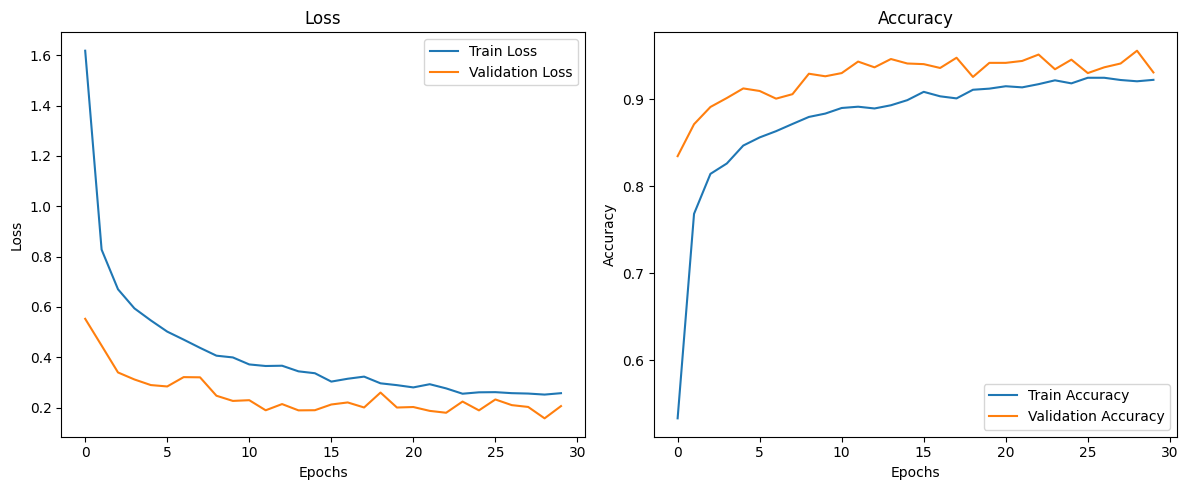

13/13 [==============================] - 3s 214ms/step - loss: 0.9434 - accuracy: 0.7204
Test Loss: 0.9434, Test Accuracy: 0.7204


In [41]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './working/split_dataset/train'
valid_dir = './working/split_dataset/valid'
test_dir = './working/split_dataset/test'

# Create Data Generators for train, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,           # Randomly rotate images by 30 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by 20% of total width
    height_shift_range=0.2,      # Randomly shift images vertically by 20% of total height
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom by 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=True
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=False
)

# Load DenseNet121 without the top layer and add fully-connected layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in DenseNet121 to prevent updating their weights
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Build the model with additional layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Initialize callbacks
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, 
                               mode='max', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[checkpoint, early_stopping]
)

# Plot Loss and Accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_history(history)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

13/13 [==============================] - 3s 95ms/step
Classification Report:
                     precision    recall  f1-score   support

    Angelina Jolie       0.89      0.38      0.53        21
         Brad Pitt       0.71      0.55      0.62        22
 Denzel Washington       0.69      0.91      0.78        22
      Hugh Jackman       0.83      0.95      0.88        20
 Jennifer Lawrence       0.81      0.77      0.79        22
       Johnny Depp       0.86      0.55      0.67        22
      Kate Winslet       0.75      0.50      0.60        24
 Leonardo DiCaprio       0.81      0.71      0.76        24
         Megan Fox       0.78      0.90      0.84        20
   Natalie Portman       0.41      0.95      0.57        21
     Nicole Kidman       0.72      0.82      0.77        22
  Robert Downey Jr       0.49      0.72      0.58        25
    Sandra Bullock       1.00      0.61      0.76        23
Scarlett Johansson       0.76      0.80      0.78        44
        Tom Cruise   

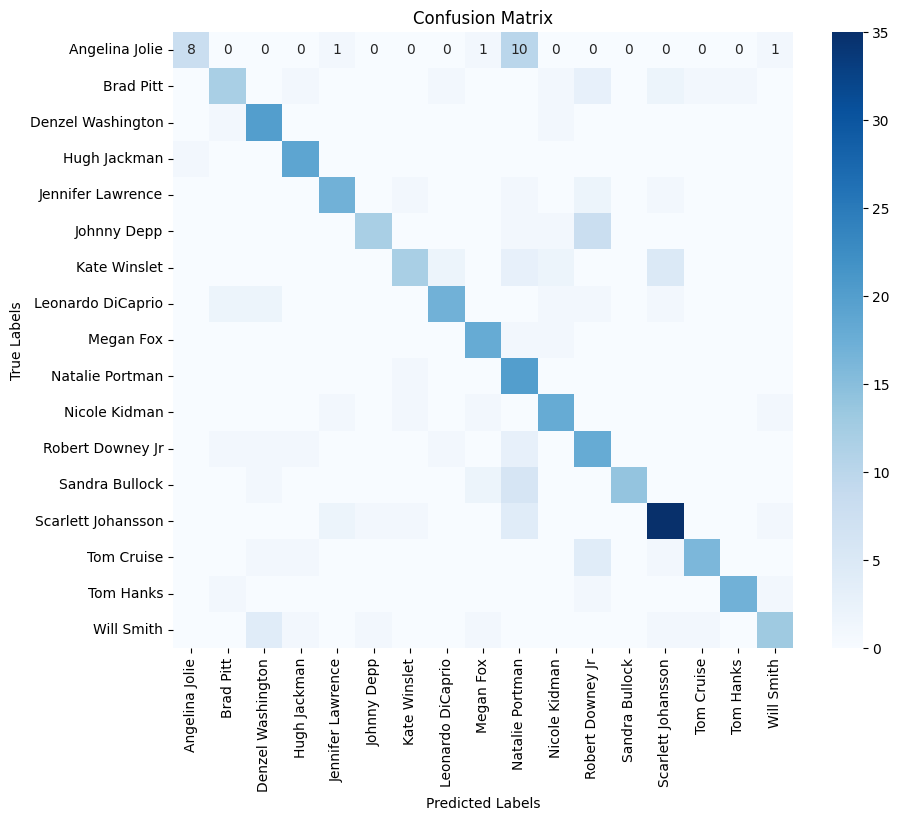

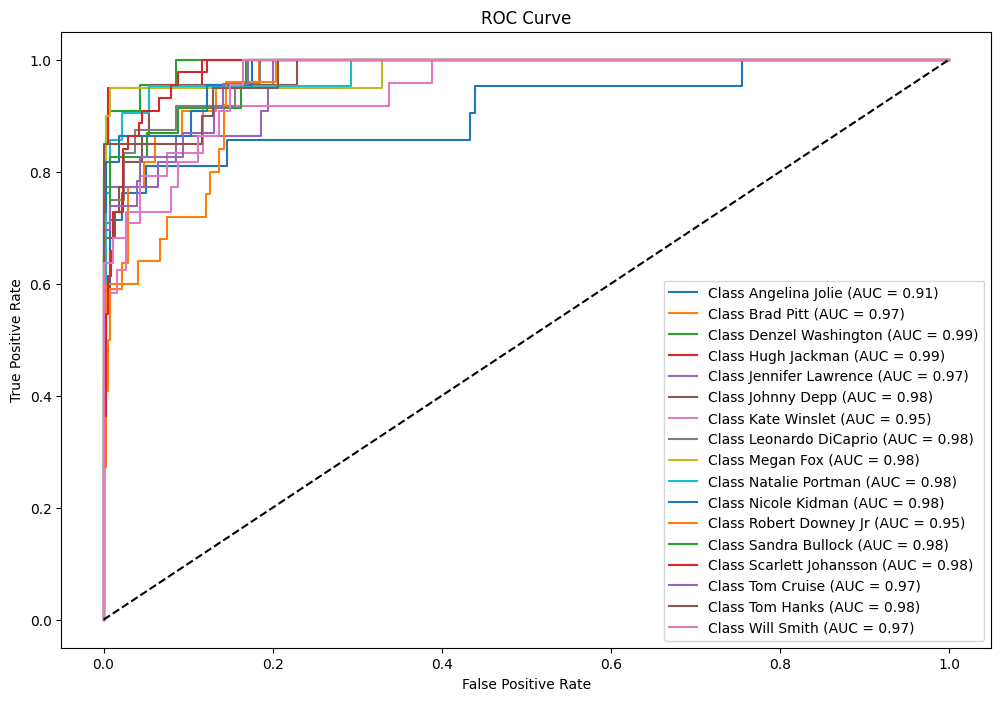

Overall Accuracy: 0.7204
Macro F1-Score: 0.7213
Weighted F1-Score: 0.7217


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns
# Get true labels

true_labels = test_generator.classes

# Predict probabilities and classes
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
# Generate a classification report
class_labels = list(test_generator.class_indices.keys())  # Class names
report = classification_report(true_labels, pred_classes, target_names=class_labels)
print("Classification Report:\n", report)
# Generate the confusion matrix
cm = confusion_matrix(true_labels, pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
from sklearn.preprocessing import label_binarize

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(len(class_labels)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import accuracy_score, f1_score

# Compute accuracy
accuracy = accuracy_score(true_labels, pred_classes)

# Compute F1-score (macro-averaged)
f1_macro = f1_score(true_labels, pred_classes, average='macro')

# Compute F1-score (weighted)
f1_weighted = f1_score(true_labels, pred_classes, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1-Score: {f1_macro:.4f}")
print(f"Weighted F1-Score: {f1_weighted:.4f}")


In [43]:
model.save('celebrity_classification_model1.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5436 images belonging to 17 classes.
Found 1360 images belonging to 17 classes.
Found 397 images belonging to 17 classes.
Epoch 1/30
170/170 [==============================] - ETA: 0s - loss: 3.2628 - accuracy: 0.6120
Epoch 1: val_accuracy improved from -inf to 0.85809, saving model to best_model1.h5
170/170 [==============================] - 90s 470ms/step - loss: 3.2628 - accuracy: 0.6120 - val_loss: 1.6625 - val_accuracy: 0.8581
Epoch 2/30
170/170 [==============================] - ETA: 0s - loss: 1.6382 - accuracy: 0.8129
Epoch 2: val_accuracy improved from 0.85809 to 0.88456, saving model to best_model1.h5
170/170 [==============================] - 79s 462ms/step - loss: 1.6382 - accuracy: 0.8129 - val_loss: 1.1404 - val_accuracy: 0.8846
Epoch 3/30
170/170 [==============================] - ETA: 0s - loss: 1.1568 - accuracy: 0.8560
Epoch 3: val_accuracy improved from 0.88456 to 0.90515, saving model to best_model1.h5
170/170 [==============================] - 78s 460ms/step 

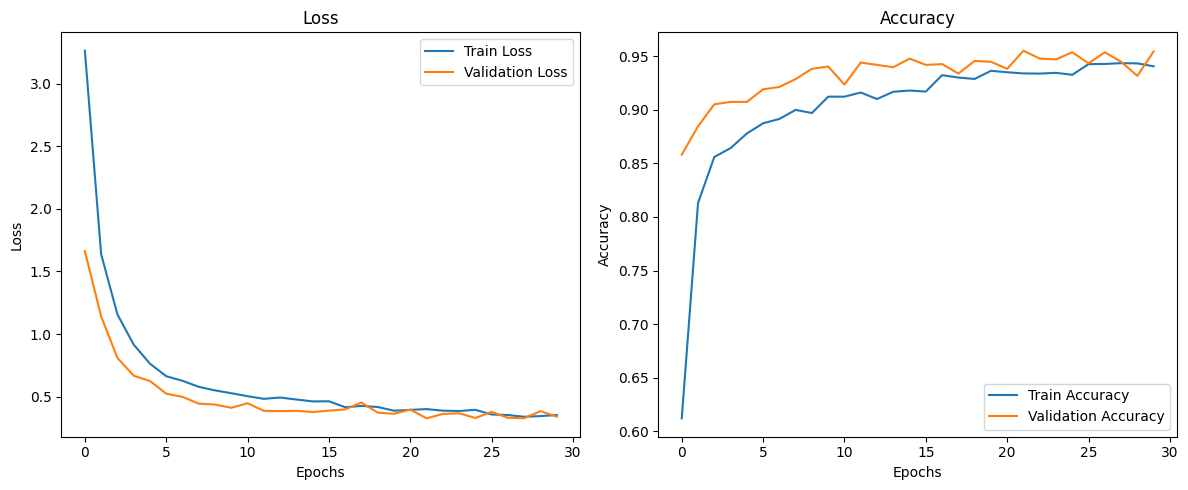

13/13 [==============================] - 1s 91ms/step - loss: 1.0212 - accuracy: 0.7708
Test Loss: 1.0212, Test Accuracy: 0.7708


In [44]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

train_dir = './working/split_dataset/train'
valid_dir = './working/split_dataset/valid'
test_dir = './working/split_dataset/test'

# Create Data Generators for train, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,           # Randomly rotate images by 30 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by 20% of total width
    height_shift_range=0.2,      # Randomly shift images vertically by 20% of total height
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom by 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=True
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=False
)

# Load DenseNet121 without the top layer and add fully-connected layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in DenseNet121 to prevent updating their weights
for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Build the model with additional layers
model1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Add L2 regularization
    Dropout(0.2),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Initialize callbacks
checkpoint = ModelCheckpoint(
    filepath='best_model1.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, 
                               mode='max', verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, 
                                 min_lr=1e-6, verbose=1)

# Train the model
history = model1.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[checkpoint, early_stopping]
)

# Plot Loss and Accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_history(history)

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

13/13 [==============================] - 3s 95ms/step
Classification Report:
                     precision    recall  f1-score   support

    Angelina Jolie       0.87      0.62      0.72        21
         Brad Pitt       0.74      0.77      0.76        22
 Denzel Washington       0.90      0.86      0.88        22
      Hugh Jackman       0.83      0.95      0.88        20
 Jennifer Lawrence       0.78      0.82      0.80        22
       Johnny Depp       0.83      0.86      0.84        22
      Kate Winslet       0.81      0.71      0.76        24
 Leonardo DiCaprio       0.94      0.71      0.81        24
         Megan Fox       1.00      0.70      0.82        20
   Natalie Portman       0.68      0.81      0.74        21
     Nicole Kidman       0.76      0.73      0.74        22
  Robert Downey Jr       0.45      0.52      0.48        25
    Sandra Bullock       0.59      0.87      0.70        23
Scarlett Johansson       0.76      0.93      0.84        44
        Tom Cruise   

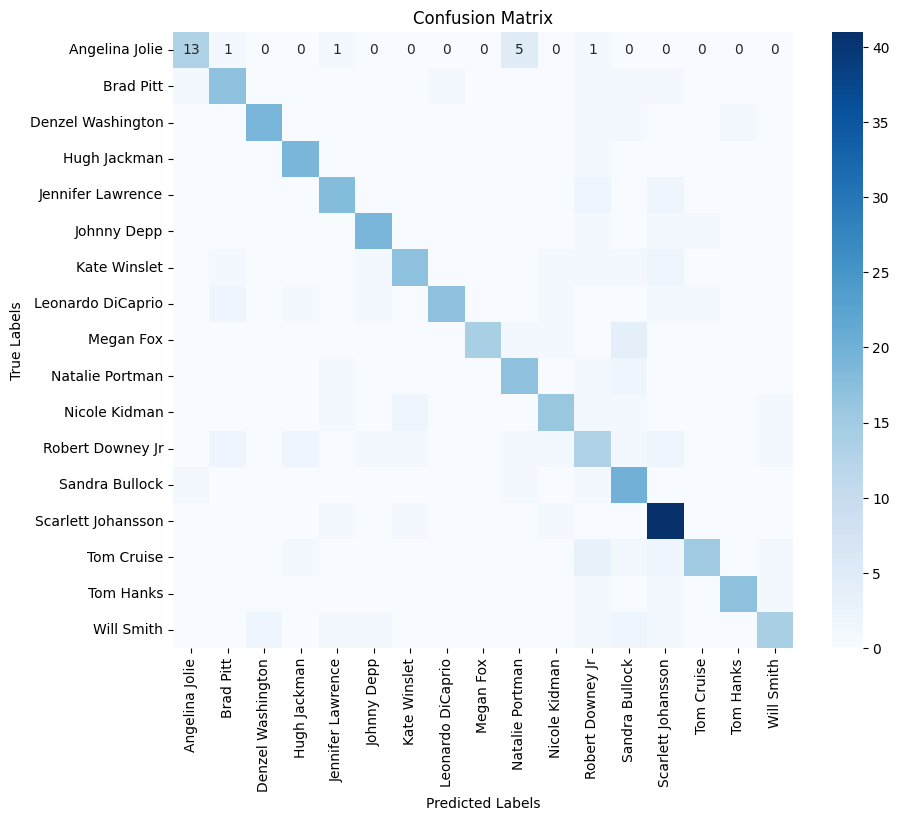

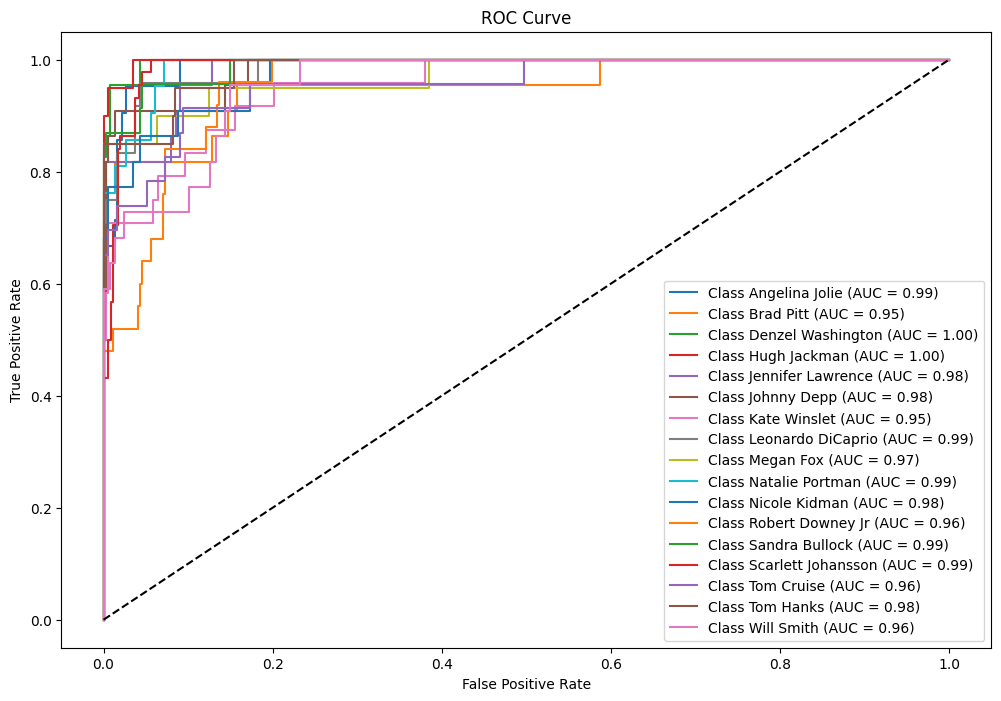

Overall Accuracy: 0.7708
Macro F1-Score: 0.7721
Weighted F1-Score: 0.7722


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns
# Get true labels
true_labels = test_generator.classes

# Predict probabilities and classes
pred_probs = model1.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
# Generate a classification report
class_labels = list(test_generator.class_indices.keys())  # Class names
report = classification_report(true_labels, pred_classes, target_names=class_labels)
print("Classification Report:\n", report)
# Generate the confusion matrix
cm = confusion_matrix(true_labels, pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
from sklearn.preprocessing import label_binarize

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(len(class_labels)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import accuracy_score, f1_score

# Compute accuracy
accuracy = accuracy_score(true_labels, pred_classes)

# Compute F1-score (macro-averaged)
f1_macro = f1_score(true_labels, pred_classes, average='macro')

# Compute F1-score (weighted)
f1_weighted = f1_score(true_labels, pred_classes, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1-Score: {f1_macro:.4f}")
print(f"Weighted F1-Score: {f1_weighted:.4f}")


In [46]:
model.save('celebrity_classification_model2.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5436 images belonging to 17 classes.
Found 1360 images belonging to 17 classes.
Found 397 images belonging to 17 classes.
Epoch 1/30
170/170 [==============================] - ETA: 0s - loss: 6.0263 - accuracy: 0.6812
Epoch 1: val_accuracy improved from -inf to 0.62794, saving model to best_model2.h5
170/170 [==============================] - 154s 497ms/step - loss: 6.0263 - accuracy: 0.6812 - val_loss: 3.8625 - val_accuracy: 0.6279 - lr: 0.0010
Epoch 2/30
170/170 [==============================] - ETA: 0s - loss: 2.3568 - accuracy: 0.8414
Epoch 2: val_accuracy improved from 0.62794 to 0.80221, saving model to best_model2.h5
170/170 [==============================] - 79s 465ms/step - loss: 2.3568 - accuracy: 0.8414 - val_loss: 1.8863 - val_accuracy: 0.8022 - lr: 0.0010
Epoch 3/30
170/170 [==============================] - ETA: 0s - loss: 1.4506 - accuracy: 0.8775
Epoch 3: val_accuracy improved from 0.80221 to 0.83824, saving model to best_model2.h5
170/170 [======================

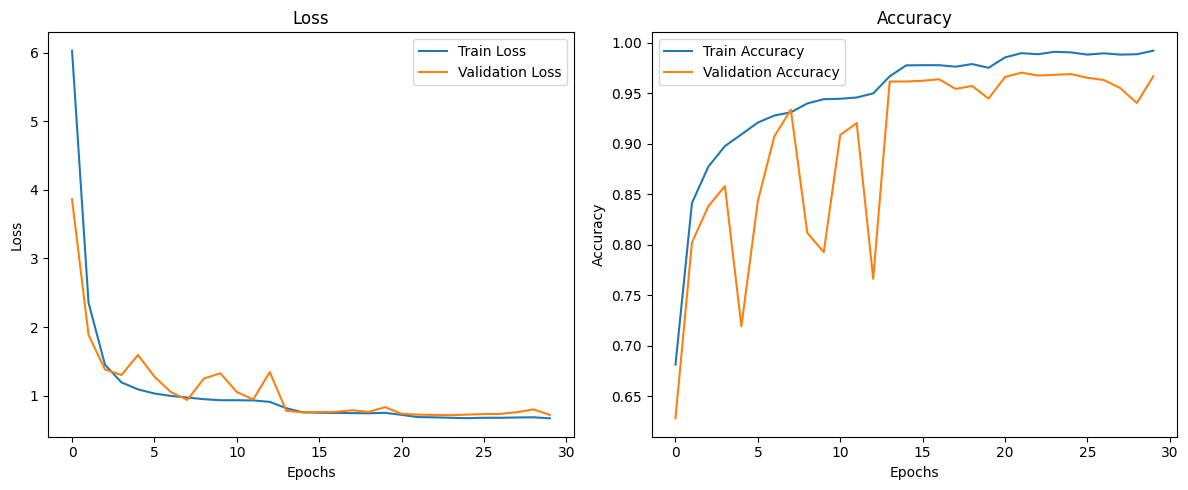

13/13 [==============================] - 1s 90ms/step - loss: 1.0487 - accuracy: 0.8640
Test Loss: 1.0487, Test Accuracy: 0.8640


In [48]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './working/split_dataset/train'
valid_dir = './working/split_dataset/valid'
test_dir = './working/split_dataset/test'

# Create Data Generators for train, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,           # Randomly rotate images by 30 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by 20% of total width
    height_shift_range=0.2,      # Randomly shift images vertically by 20% of total height
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom by 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=True
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=False
)

# Load DenseNet121 without the top layer and add fully-connected layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in DenseNet121 to prevent updating their weights
for layer in base_model.layers:
    layer.trainable = True


# Build the model with additional layers
from tensorflow.keras.regularizers import l2

model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(train_generator.num_classes, activation='softmax')
])


from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Initialize ReduceLROnPlateau callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',         # Monitor validation loss
    factor=0.5,                 # Reduce learning rate by a factor of 0.5
    patience=5,                 # Wait for 5 epochs without improvement
    min_lr=1e-6,                # Minimum learning rate
    verbose=1                   # Display learning rate adjustments
)

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss
    patience=10,                # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore the best weights when stopping
    verbose=1
)

# Initialize ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath='best_model2.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Train the model
history = model2.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,                  # Set a higher maximum number of epochs
    callbacks=[checkpoint, early_stopping, lr_scheduler],  # Include the callbacks
    verbose=1
)


# Plot Loss and Accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_history(history)

# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

13/13 [==============================] - 3s 93ms/step
Classification Report:
                     precision    recall  f1-score   support

    Angelina Jolie       0.95      0.90      0.93        21
         Brad Pitt       0.88      0.64      0.74        22
 Denzel Washington       0.91      0.95      0.93        22
      Hugh Jackman       0.90      0.95      0.93        20
 Jennifer Lawrence       1.00      0.82      0.90        22
       Johnny Depp       0.95      0.82      0.88        22
      Kate Winslet       0.87      0.83      0.85        24
 Leonardo DiCaprio       0.73      0.92      0.81        24
         Megan Fox       0.83      1.00      0.91        20
   Natalie Portman       0.95      0.90      0.93        21
     Nicole Kidman       1.00      0.77      0.87        22
  Robert Downey Jr       0.72      0.84      0.78        25
    Sandra Bullock       0.67      0.87      0.75        23
Scarlett Johansson       0.88      0.95      0.91        44
        Tom Cruise   

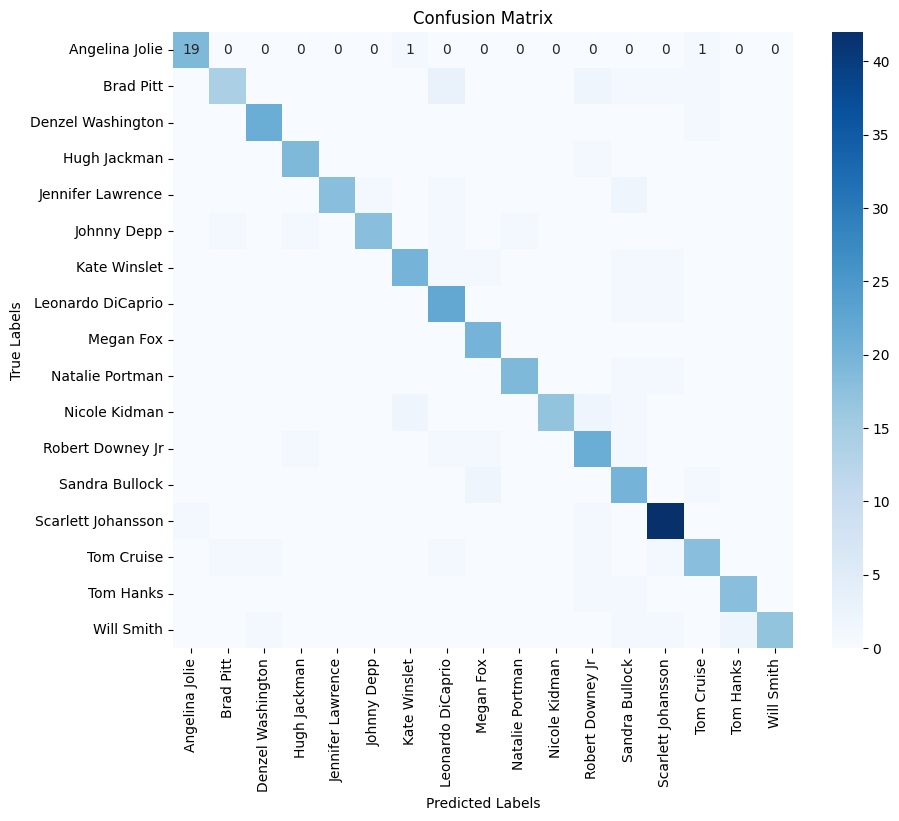

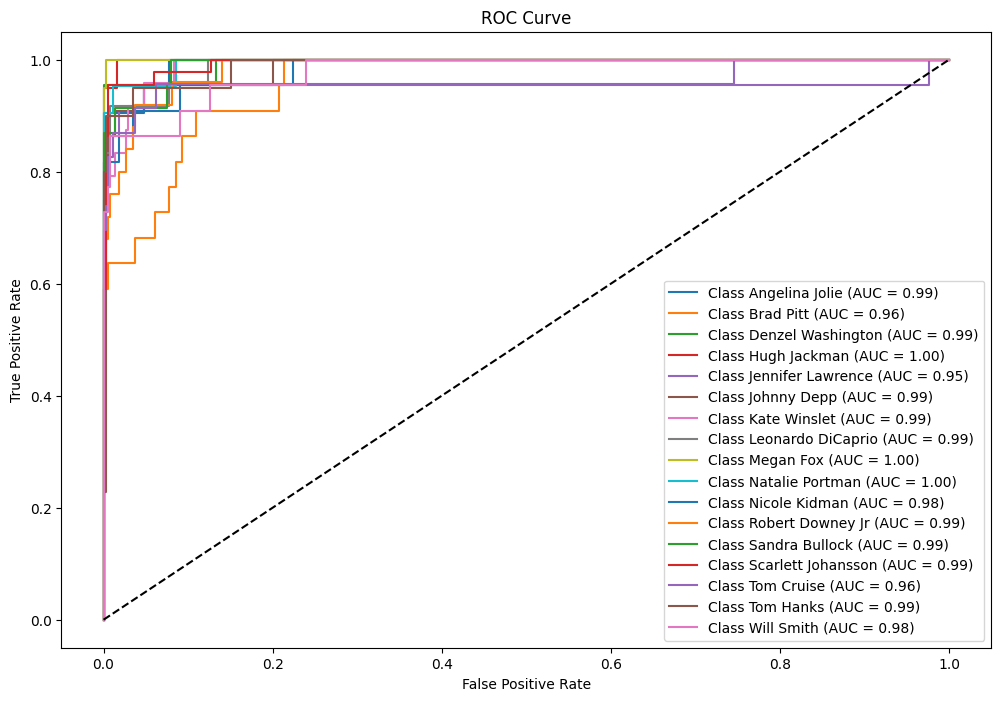

Overall Accuracy: 0.8640
Macro F1-Score: 0.8643
Weighted F1-Score: 0.8645


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns
# Get true labels
true_labels = test_generator.classes

# Predict probabilities and classes
pred_probs = model2.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
# Generate a classification report
class_labels = list(test_generator.class_indices.keys())  # Class names
report = classification_report(true_labels, pred_classes, target_names=class_labels)
print("Classification Report:\n", report)
# Generate the confusion matrix
cm = confusion_matrix(true_labels, pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
from sklearn.preprocessing import label_binarize

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(len(class_labels)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import accuracy_score, f1_score

# Compute accuracy
accuracy = accuracy_score(true_labels, pred_classes)

# Compute F1-score (macro-averaged)
f1_macro = f1_score(true_labels, pred_classes, average='macro')

# Compute F1-score (weighted)
f1_weighted = f1_score(true_labels, pred_classes, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1-Score: {f1_macro:.4f}")
print(f"Weighted F1-Score: {f1_weighted:.4f}")


In [50]:
model.save('celebrity_classification_model3.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step


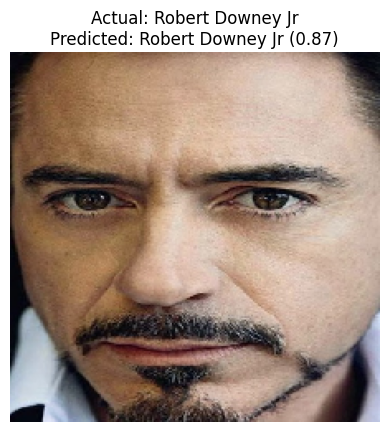

1/1 [==============================] - 0s 37ms/step


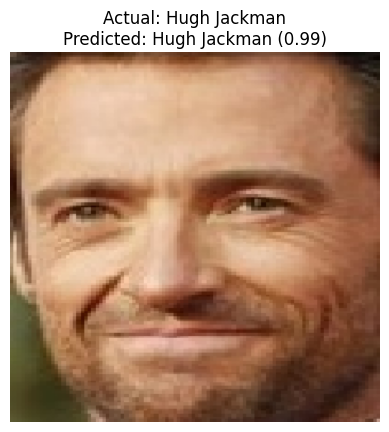

1/1 [==============================] - 0s 36ms/step


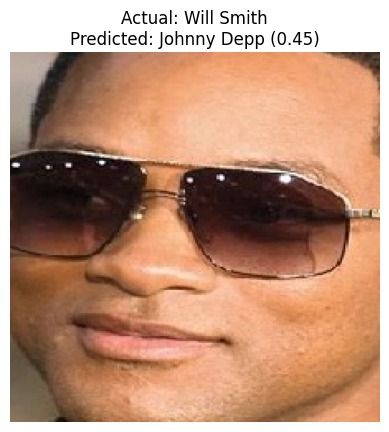

1/1 [==============================] - 0s 37ms/step


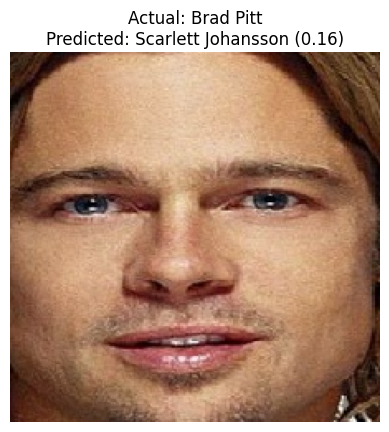

1/1 [==============================] - 0s 37ms/step


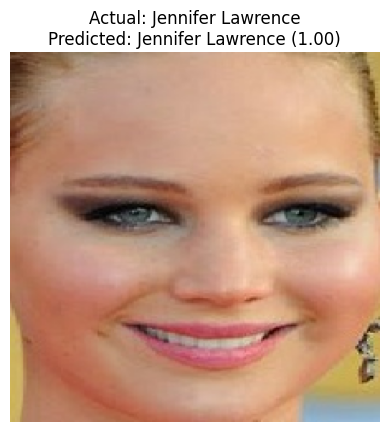

1/1 [==============================] - 0s 37ms/step


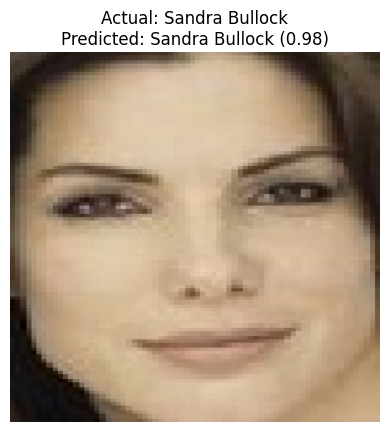

1/1 [==============================] - 0s 36ms/step


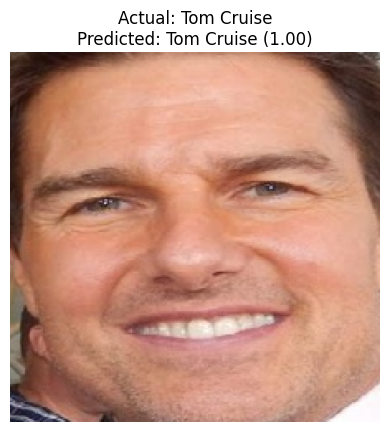

1/1 [==============================] - 0s 39ms/step


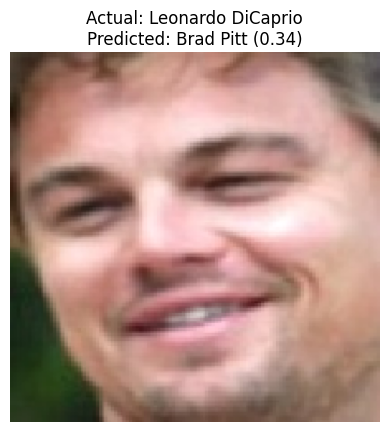

1/1 [==============================] - 0s 36ms/step


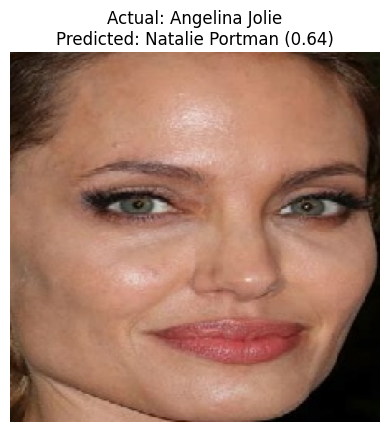

1/1 [==============================] - 0s 39ms/step


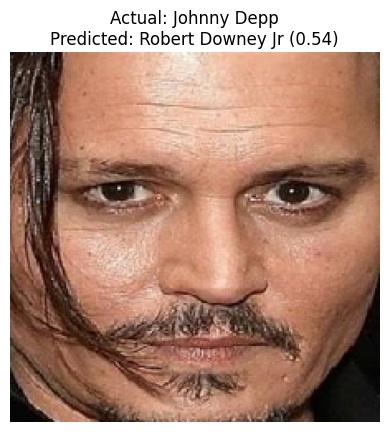

1/1 [==============================] - 0s 35ms/step


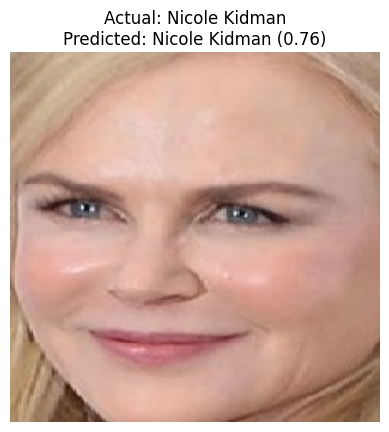

1/1 [==============================] - 0s 36ms/step


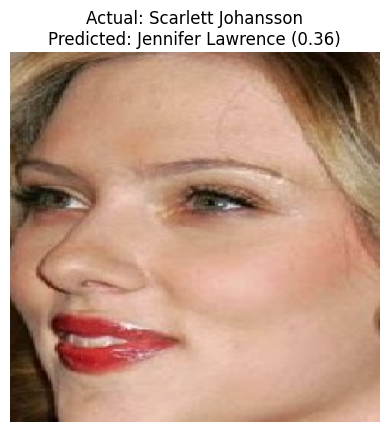

1/1 [==============================] - 0s 37ms/step


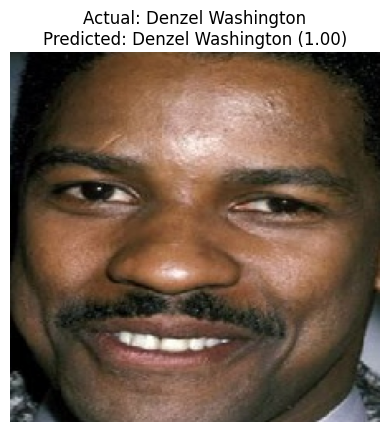

1/1 [==============================] - 0s 37ms/step


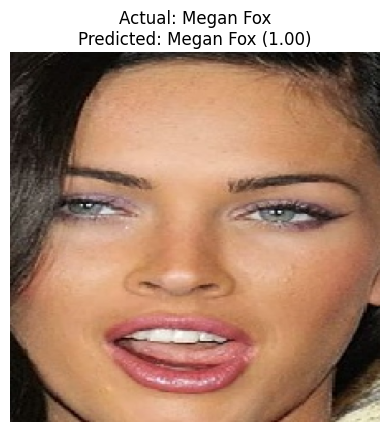

1/1 [==============================] - 0s 34ms/step


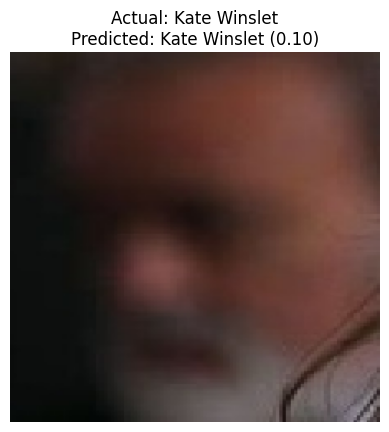

1/1 [==============================] - 0s 35ms/step


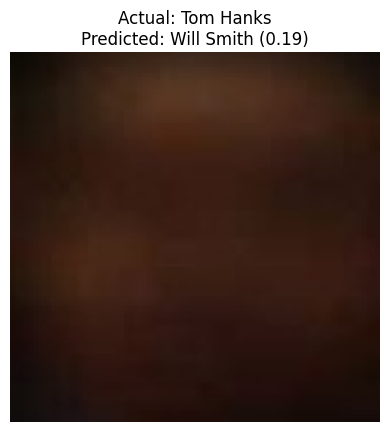

1/1 [==============================] - 0s 37ms/step


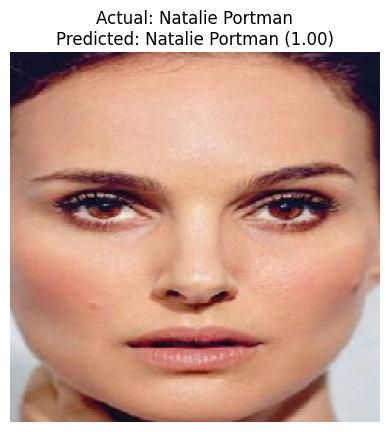

In [10]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model3 = tf.keras.models.load_model('celebrity_classification_model3.h5')

# Get class indices mapping
class_indices = test_generator.class_indices
classes = {v: k for k, v in class_indices.items()}  # Reverse the mapping

# Choose 3 random images from the test dataset
test_images_dir = test_dir
random_images = []

for class_dir in os.listdir(test_images_dir):
    class_path = os.path.join(test_images_dir, class_dir)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        if images:
            random_image = random.choice(images)
            random_images.append((class_dir, os.path.join(class_path, random_image)))

# Process and predict for each image
for actual_class, image_path in random_images:
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    predictions = model3.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = classes[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]

    # Display the image and results
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class} ({confidence:.2f})")
    plt.show()
